In [1]:
! wget https://data.cci.ceda.ac.uk/thredds/fileServer/esacci/land_surface_temperature/data/SENTINEL3B_SLSTR/L3C/0.01/v3.00/daily/2019/02/11/ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1DAILY_DAY-20190211000000-fv3.00.nc -O /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/sentinel.nc

--2022-03-22 13:22:38--  https://data.cci.ceda.ac.uk/thredds/fileServer/esacci/land_surface_temperature/data/SENTINEL3B_SLSTR/L3C/0.01/v3.00/daily/2019/02/11/ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1DAILY_DAY-20190211000000-fv3.00.nc
Resolving data.cci.ceda.ac.uk (data.cci.ceda.ac.uk)... 130.246.128.97
Connecting to data.cci.ceda.ac.uk (data.cci.ceda.ac.uk)|130.246.128.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444605058 (424M) [application/octet-stream]
Saving to: ‘/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/sentinel.nc’

/network/group/aopp 100%[===================>] 424.01M  14.6MB/s    in 33s     

2022-03-22 13:23:11 (13.0 MB/s) - ‘/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/sentinel.nc’ saved [444605058/444605058]



In [1]:
import xarray as xr
import rioxarray

In [11]:
ds = xr.open_dataset('/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/sentinel.nc')

In [21]:
ds

<xarray.Dataset>
Dimensions:          (time: 1, lat: 18000, lon: 36000, length_scale: 1, channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 2019-02-11
  * lat              (lat) float32 -90.0 -89.99 -89.98 ... 89.97 89.98 89.99
  * lon              (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * channel          (channel) float32 11.0 12.0
Dimensions without coordinates: length_scale
Data variables: (12/13)
    dtime            (time, lat, lon) timedelta64[ns] ...
    satze            (time, lat, lon) float32 ...
    sataz            (time, lat, lon) float32 ...
    solze            (time, lat, lon) float32 ...
    solaz            (time, lat, lon) float32 ...
    qual_flag        (time, lat, lon) float32 ...
    ...               ...
    lst_uncertainty  (time, lat, lon) float32 ...
    lst_unc_ran      (time, lat, lon) float32 ...
    lst_unc_loc_atm  (time, lat, lon) float32 ...
    lst_unc_loc_sfc  (time, lat, lon) float32 ...
    lst_unc_sys      (length_scale) float32 0.029
    lcc              (time, lat, lon) float32 ...
Attributes: (12/41)
    title:                      ESA LST CCI land surface temperature data at ...
    institution:                University of Leicester
    source:                     ESA LST CCI SLSTRB L3U V3.0
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    Conventions:                CF-1.8
    ...                         ...
    geospatial_lon_resolution:  0.01
    geospatial_lat_resolution:  0.01
    key_variables:              land_surface_temperature
    format_version:             CCI Data Standards v2.2
    spatial_resolution:         0.01 degree
    doi:                        10.5285/5f66a881adf846bfaad58b0e6068f0ea

In [18]:
lite = ds[['dtime','lst']]

In [59]:
df = lite.to_dataframe()

In [60]:
df = df.dropna().reset_index()

In [61]:
w = df.copy() #make a copy to leave original

In [62]:
w

,time,lat,lon,dtime,lst
0,2019-02-11,-85.905006,-69.665009,0 days 08:28:55,246.259995
1,2019-02-11,-85.905006,-69.655006,0 days 08:28:55,246.259995
2,2019-02-11,-85.905006,-69.645004,0 days 08:28:55,246.259995
3,2019-02-11,-85.905006,-69.635002,0 days 08:28:55,246.269989
4,2019-02-11,-85.905006,-69.625008,0 days 08:28:55,246.259995
...,...,...,...,...,...
72860567,2019-02-11,76.084999,-108.425003,0 days 19:28:13,252.209991
72860568,2019-02-11,76.084999,-108.415001,0 days 19:28:11.992187500,251.989990
72860569,2019-02-11,76.084999,-108.405006,0 days 19:28:11.992187500,251.799988
72860570,2019-02-11,76.084999,-108.395004,0 days 19:28:11.992187500,251.619995


In [63]:
w = w.drop('time',axis=1)

In [67]:
w['time_hourly'] = w.dtime.round('H')
w['time_float'] = w.time_hourly.dt.total_seconds()/3600

In [70]:
w11

,lat,lon,dtime,lst,time_hourly,time_float
36148402,10.435000,-14.554997,0 days 11:22:20,307.309998,0 days 11:00:00,11.0
36148403,10.435000,-14.545003,0 days 11:22:20,307.320007,0 days 11:00:00,11.0
36151391,10.444995,-14.554997,0 days 11:22:20,307.309998,0 days 11:00:00,11.0
36151392,10.444995,-14.545003,0 days 11:22:20,307.320007,0 days 11:00:00,11.0
36256966,10.795001,-15.005010,0 days 11:22:12,307.529999,0 days 11:00:00,11.0
...,...,...,...,...,...,...
72262039,74.494987,18.805002,0 days 11:03:36,269.639984,0 days 11:00:00,11.0
72264522,74.504997,18.884989,0 days 11:03:36,272.049988,0 days 11:00:00,11.0
72269401,74.524986,19.085001,0 days 11:03:35,272.359985,0 days 11:00:00,11.0
72269402,74.524986,19.094995,0 days 11:03:35,272.359985,0 days 11:00:00,11.0


In [80]:
import matplotlib.colors as mc
import matplotlib.colorbar as cb  
import matplotlib.pyplot as plt

def plot_map(df,z,vmin,vmax,cmap):
    
    #Get all data as vectors
    x = df.lon
    y = df.lat
    z1 = df[z]
    
    #Scatter plot it
    # init the figure
    fig,[ax,cax] = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]},figsize=(30, 20))

    
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    sc = ax.scatter(x, y,
               s=1,
               c=cmap(norm(z1)),
               linewidths=1, alpha=.7
               )

    ax.set_title(z)
    ax.set_xlim(-180,180)
    ax.set_ylim(-70,70)

    plt.show()

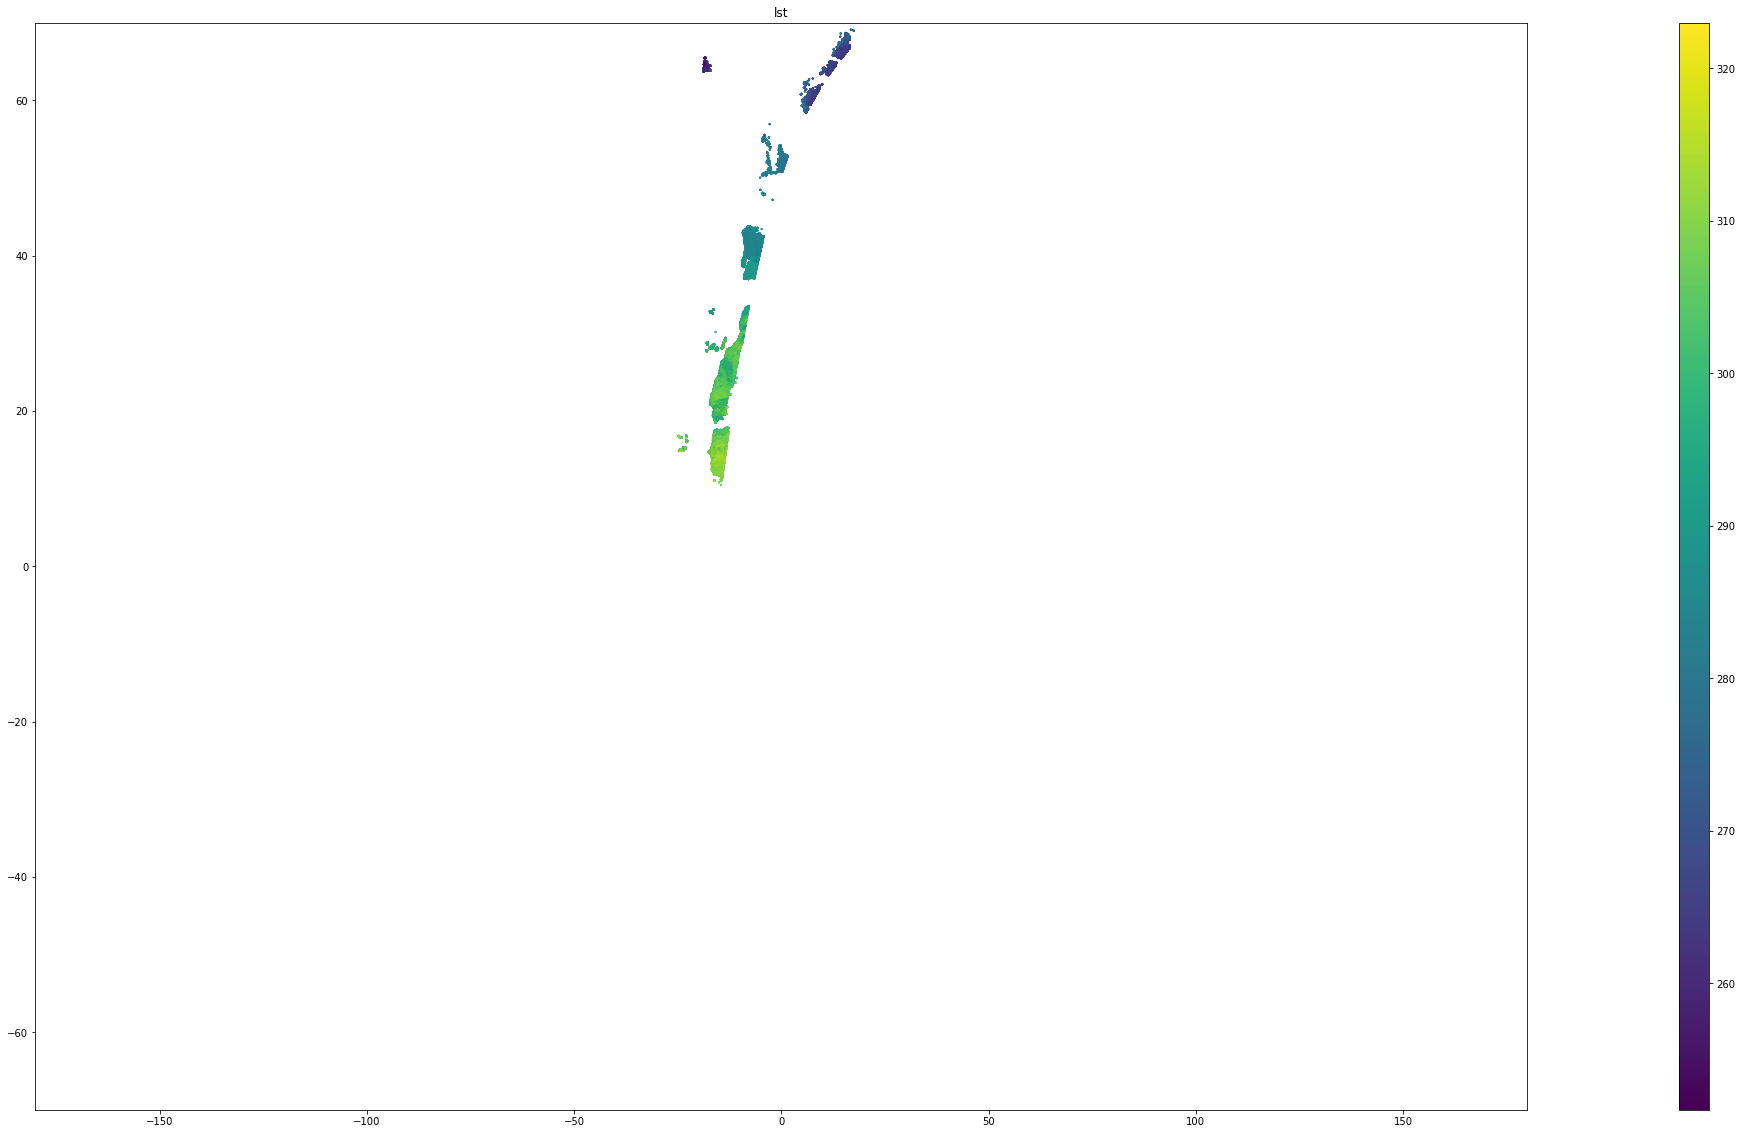

In [81]:
w11 = w.query('time_float == 11.0')
plot_map(w11,'lst',vmin=w11.lst.min(), vmax=w11.lst.max(),cmap=plt.cm.viridis)

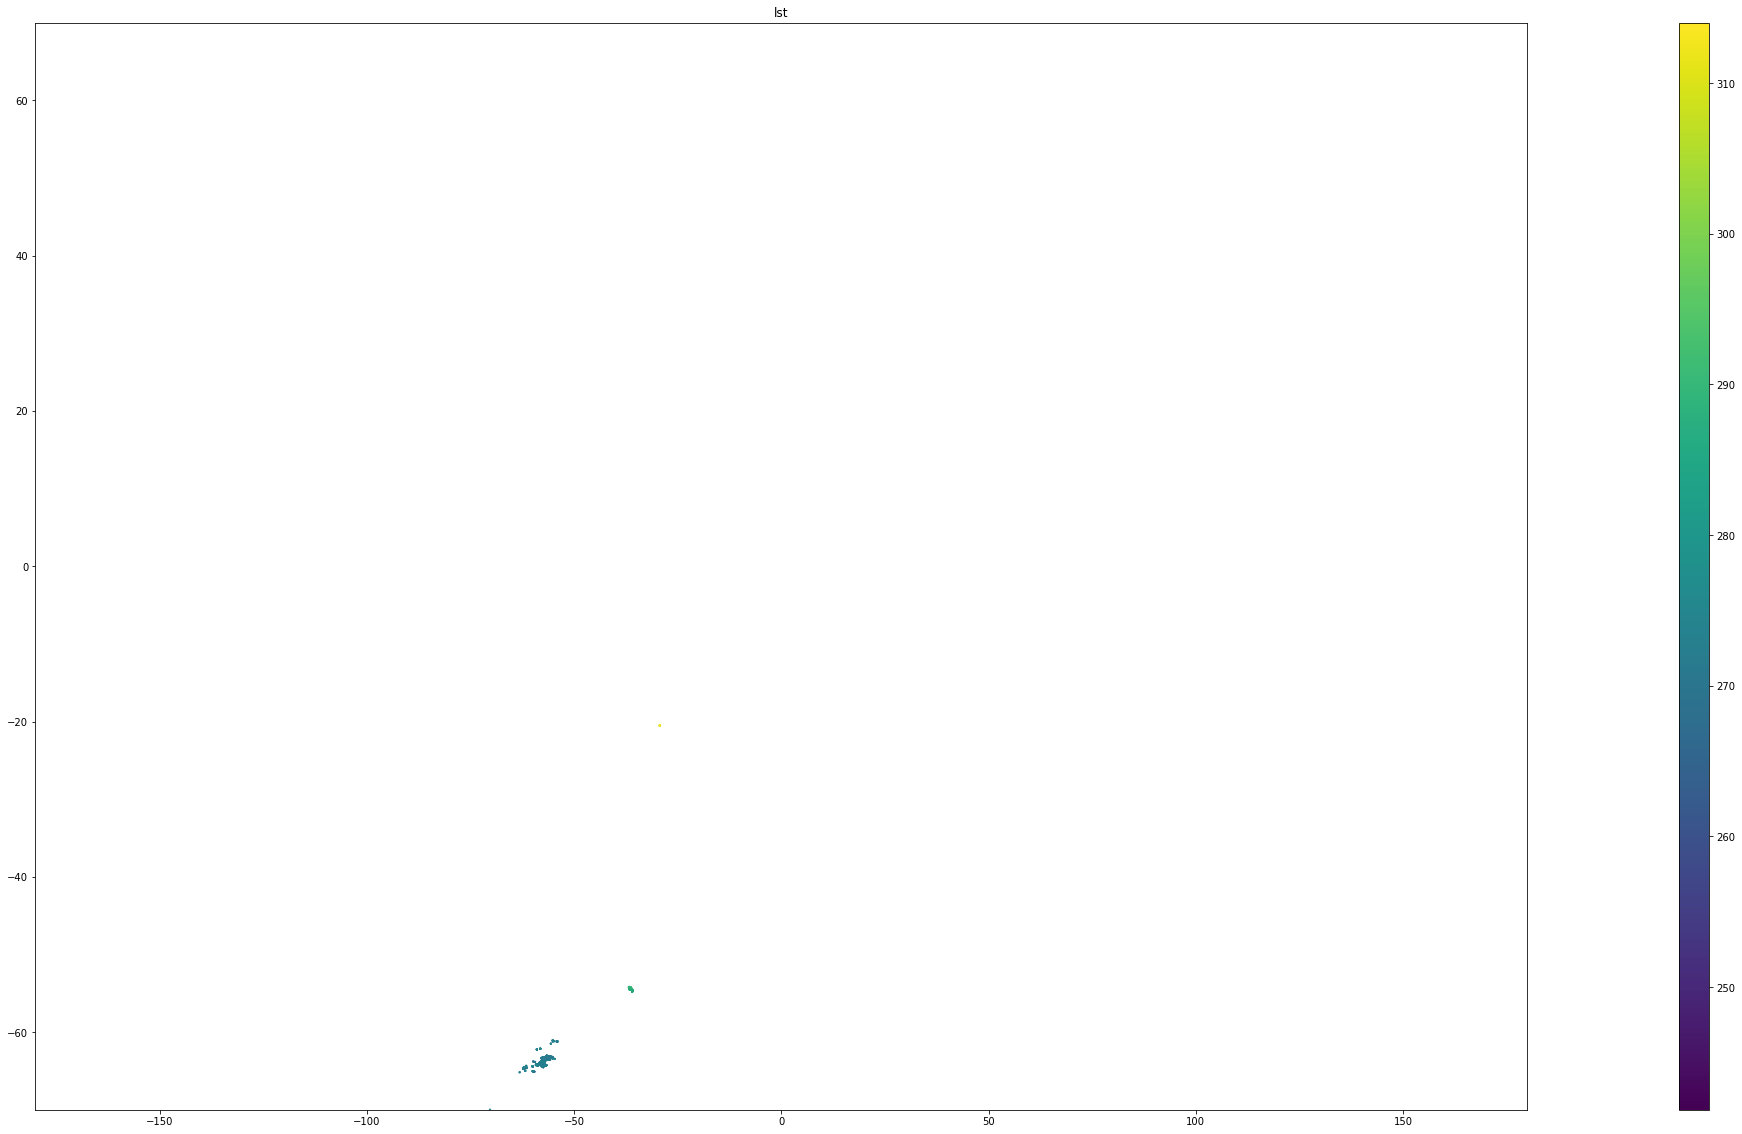

In [82]:
w12 = w.query('time_float == 12.0')
plot_map(w12,'lst',vmin=w12.lst.min(), vmax=w12.lst.max(),cmap=plt.cm.viridis)

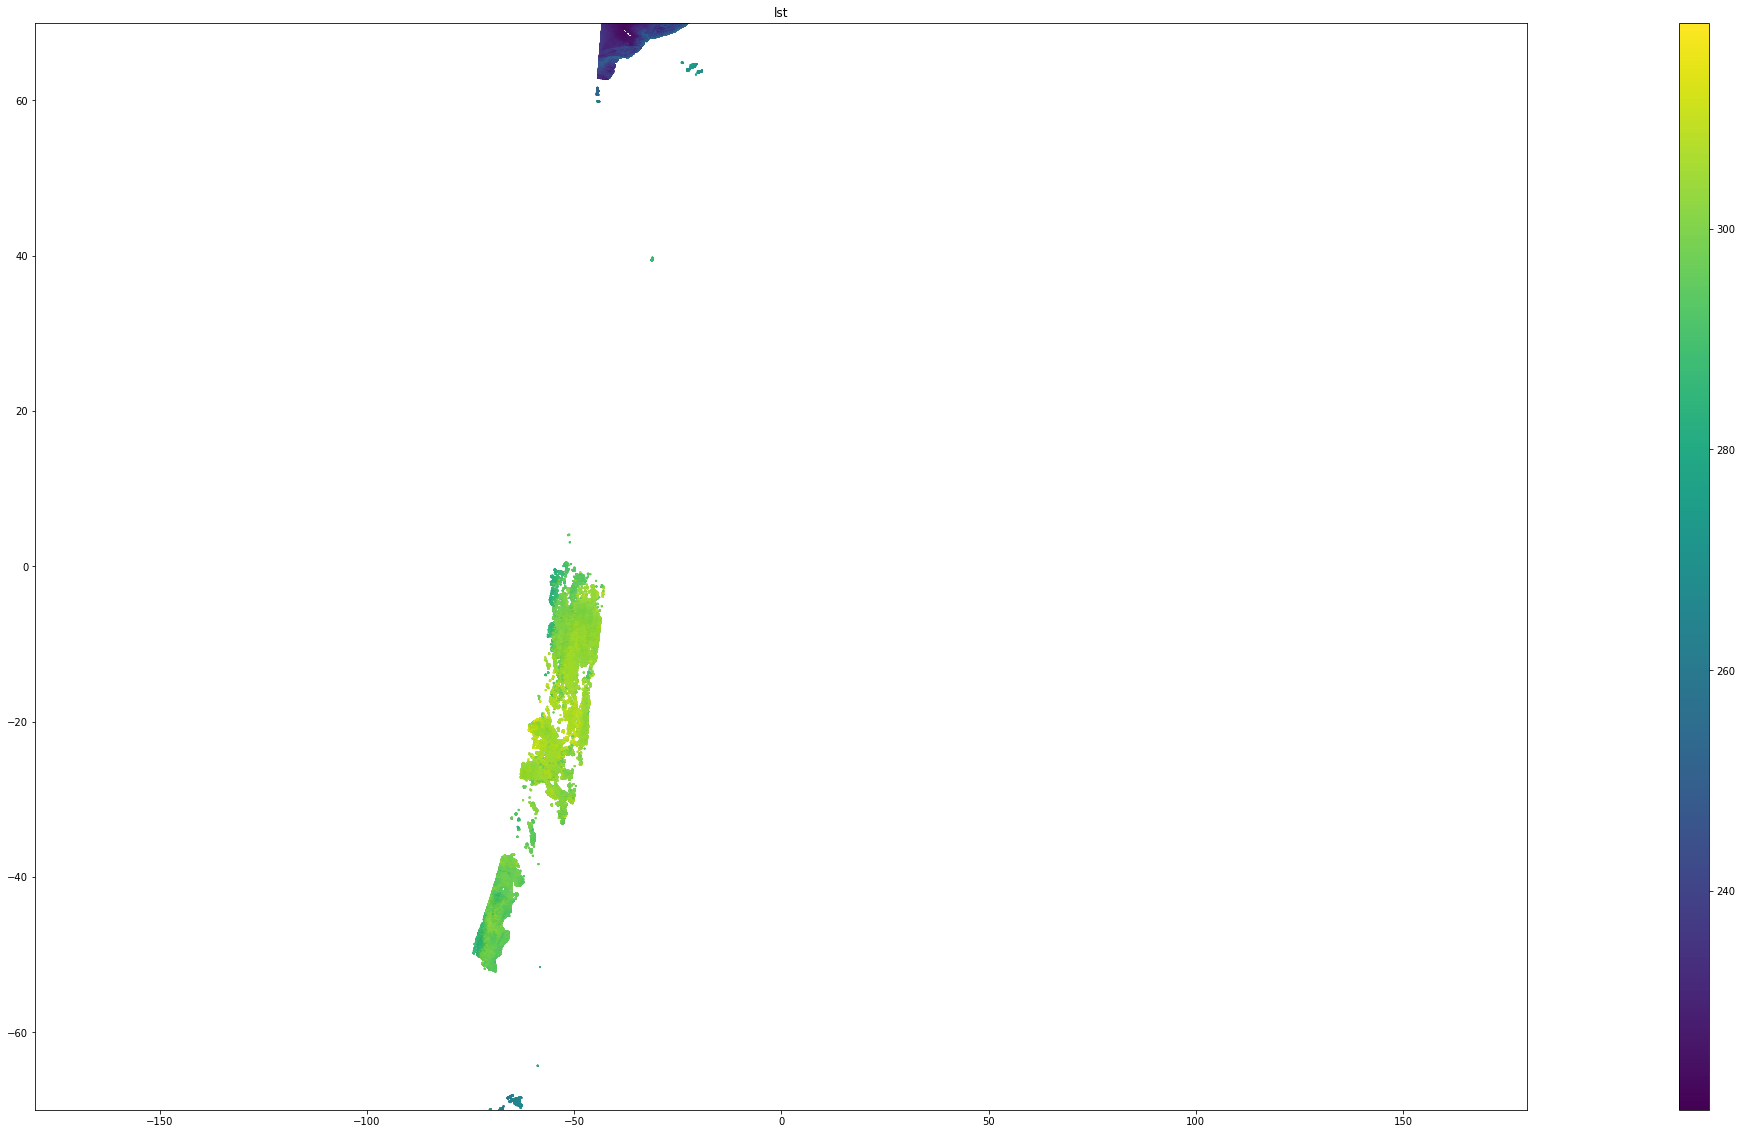

In [83]:
w13 = w.query('time_float == 13.0')
plot_map(w13,'lst',vmin=w13.lst.min(), vmax=w13.lst.max(),cmap=plt.cm.viridis)

In [89]:

from datetime import datetime
from goes2go.data import goes_latest, goes_nearesttime#, goes_timeseries

# Get latest data
G1 = goes_latest(satellite='G16', product='ABI')

# Get data for a specific time
G2 = goes_nearesttime(datetime(2020,10,1), satellite='G16', product='GLM')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/k/kimpson/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [93]:
g = goes_nearesttime(datetime(2020, 12, 25, 10),
                       satellite='goes16',
                       product='ABI-L2-LSTC',
                       return_as='xarray')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-LSTC      |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/k/kimpson/data/noaa-goes16/ABI-L2-LSTC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [97]:
g.y

<xarray.DataArray 'y' (y: 1500)>
array([0.128212, 0.128156, 0.1281  , ..., 0.04438 , 0.044324, 0.044268],
      dtype=float32)
Coordinates:
    t                                datetime64[ns] 2020-12-25T10:02:36.59156...
  * y                                (y) float32 0.1282 0.1282 ... 0.04427
    y_image                          float32 0.08624
    x_image                          float32 -0.03136
    retrieval_local_zenith_angle     float32 85.0
    quantitative_local_zenith_angle  float32 70.0
    solar_zenith_angle               float32 180.0
    dataset_name                     <U72 'OR_ABI-L2-LSTC-M6_G16_s20203601001...
    date_created                     <U22 '2020-12-25T10:04:35.0Z'
    time_coverage_start              <U22 '2020-12-25T10:01:17.9Z'
    time_coverage_end                <U22 '2020-12-25T10:03:55.2Z'
Attributes:
    units:          rad
    axis:           Y
    long_name:      GOES fixed grid projection y-coordinate
    standard_name:  projection_y_coordinate

In [98]:
g.FOV.full_disk

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


AttributeError: 'Dataset' object has no attribute 'FOV'

In [54]:
import pandas as pd
df['time'] = float(df.dtime) # #.round('H')

 #Convert local satellite time to UTC and round to nearest hour
    #time = (pd.to_datetime([file_date + " " + local_times[satellite]]*time_delta.shape[0]) - time_delta).round('H')
    
    #What date/time does the user want?
    #target_time = np.datetime64(f'{date} {utc_hour:02}:00:00')
        

TypeError: cannot convert the series to <class 'float'>

In [51]:
df.query('time == "08"')

,lat,lon,dtime,lst,time


In [41]:
import numpy as np
np.unique(df.dtime)

array([  173999969482,   175000015259,   176000000000, ...,
       85238000000000, 85239000000000, 85240000000000],
      dtype='timedelta64[ns]')

In [43]:
df_gr = df.groupby('dtime').size()

In [44]:
df_gr

dtime
0 days 00:02:53.999969482     61
0 days 00:02:55.000015259    483
0 days 00:02:56              491
0 days 00:02:57              331
0 days 00:02:58              159
                            ... 
0 days 23:40:36                4
0 days 23:40:37                6
0 days 23:40:38                6
0 days 23:40:39                3
0 days 23:40:40                1
Length: 20320, dtype: int64

In [27]:
#df['time'] = df['dtime'].round('H')

/home/k/kimpson/bin/conda/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df = df.reset_index()

ValueError: cannot insert time, already exists

In [9]:
ds.where(ds.dtime==10.5*60*60)

KeyboardInterrupt: 

In [6]:
ds.sel(dtime=slice(10.5*60*60,11.5*60*60))

KeyError: 'dtime is not a valid dimension or coordinate'

slice(37800.0, 41400.0, None)

In [5]:
24*60*60

86400

In [2]:
#Load the data

import xarray as xr
f = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib'
ds = xr.open_dataset(f,engine='cfgrib',filter_by_keys={'typeOfLevel': 'surface'})

Ignoring index file '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/ERA_skin/sfc_skin_unstructured_2018_01.grib.923a8.idx' incompatible with GRIB file


In [6]:
ds.latitude.data

array([ 89.78487691,  89.78487691,  89.78487691, ..., -89.78487691,
       -89.78487691, -89.78487691])